# Classifications : The Ultimate Notebook

### Imports

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
from sklearn import metrics
import autosklearn.classification

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### The Dataset

In [30]:
df = pd.read_csv("multiclass.csv", low_memory=True, sep=",")

In [33]:
#display(df)

## 1) autosklearn Classification

[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_tran

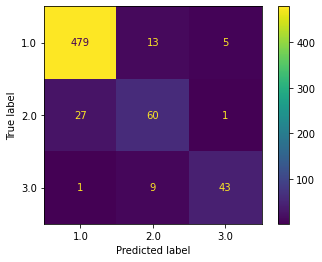

In [68]:
y = df['fetal_health']
X = df.drop("fetal_health", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task = 30, ensemble_size=1)
automl.fit(X_train, y_train)
y_pred = automl.predict(X_test)

print(automl.show_models())
print("------------------------------------------------------")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------")
print("MCC:",matthews_corrcoef(y_test, y_pred))
print("------------------------------------------------------")
print("Kappa:",cohen_kappa_score(y_test, y_pred))
print("------------------------------------------------------")
plot_confusion_matrix(model, X_test, y_test)
print(automl.sprint_statistics())

## 2) Logistic Regression

Accuracy: 0.9122257053291536
------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.73      0.68      0.71        88
         3.0       0.88      0.81      0.84        53

    accuracy                           0.91       638
   macro avg       0.85      0.82      0.83       638
weighted avg       0.91      0.91      0.91       638

------------------------------------------------------
MCC: 0.7547542884713115
------------------------------------------------------
Kappa: 0.7540274832704541
------------------------------------------------------


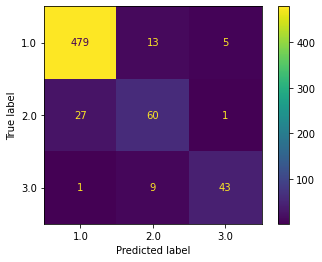

In [65]:
from sklearn.linear_model import LogisticRegression

y = df['fetal_health']
X = df.drop("fetal_health", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------")
print("MCC:",matthews_corrcoef(y_test, y_pred))
print("------------------------------------------------------")
print("Kappa:",cohen_kappa_score(y_test, y_pred))
print("------------------------------------------------------")
plot_confusion_matrix(model, X_test, y_test)

## 3) k-NN (k-Nearest Neighbors)

For k = 1
Accuracy: 0.9043887147335423
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.69      0.66      0.67        88
         3.0       0.90      0.81      0.85        53

    accuracy                           0.90       638
   macro avg       0.84      0.81      0.83       638
weighted avg       0.90      0.90      0.90       638

MCC: 0.7333263775635172
Kappa: 0.7327537664977408
------------------------------------------------------
For k = 2
Accuracy: 0.8981191222570533
              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       497
         2.0       0.72      0.53      0.61        88
         3.0       0.95      0.72      0.82        53

    accuracy                           0.90       638
   macro avg       0.86      0.74      0.79       638
weighted avg       0.89      0.90      0.89       638

MCC: 0.7015746104602769
Kappa: 0.6912205981995935
-----

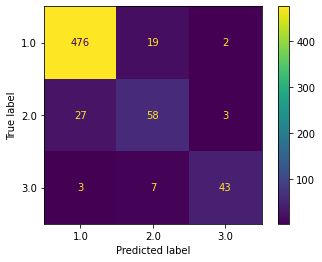

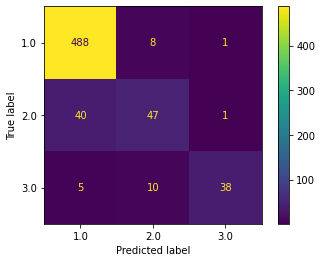

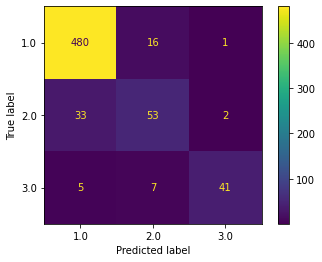

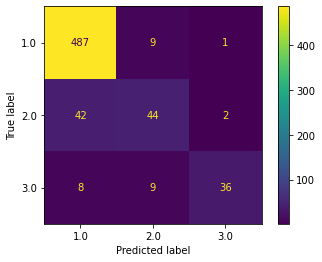

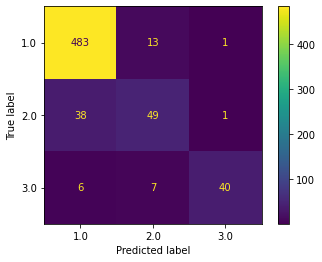

In [64]:
from sklearn.neighbors import KNeighborsClassifier

y = df['fetal_health']
X = df.drop("fetal_health", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

for k in range(1,6):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("For k =", k)
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("MCC:",matthews_corrcoef(y_test, y_pred))
    print("Kappa:",cohen_kappa_score(y_test, y_pred))
    print("------------------------------------------------------")
    plot_confusion_matrix(model, X_test, y_test)

## 4) Random Forest

For k = 5
Accuracy: 0.9404388714733543
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       497
         2.0       0.84      0.74      0.79        88
         3.0       0.92      0.91      0.91        53

    accuracy                           0.94       638
   macro avg       0.91      0.87      0.89       638
weighted avg       0.94      0.94      0.94       638

MCC: 0.8335483727122655
Kappa: 0.8322667238599963
------------------------------------------------------
For k = 10
Accuracy: 0.9341692789968652
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       497
         2.0       0.86      0.64      0.73        88
         3.0       0.98      0.98      0.98        53

    accuracy                           0.93       638
   macro avg       0.93      0.87      0.89       638
weighted avg       0.93      0.93      0.93       638

MCC: 0.8138337594009581
Kappa: 0.8087024808138497
----

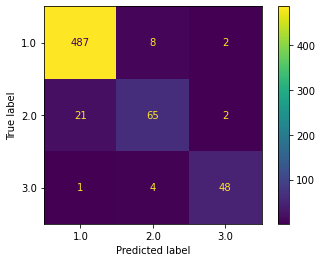

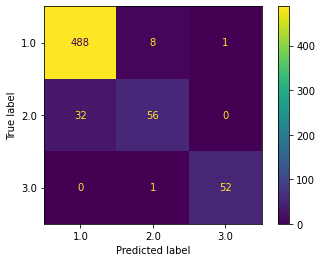

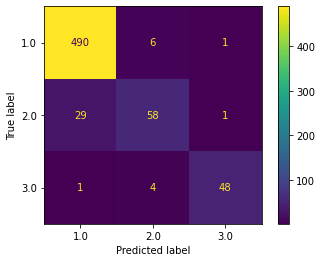

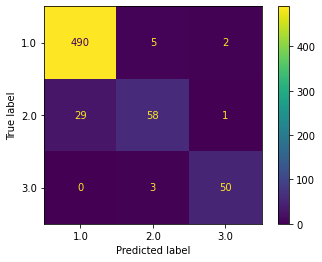

In [62]:
from sklearn.ensemble import RandomForestClassifier

y = df['fetal_health']
X = df.drop("fetal_health", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

for k in (5,10,20,100):
    model=RandomForestClassifier(n_estimators=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("For k =", k)
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("MCC:",matthews_corrcoef(y_test, y_pred))
    print("Kappa:",cohen_kappa_score(y_test, y_pred))
    print("------------------------------------------------------")
    plot_confusion_matrix(model, X_test, y_test)

## 5) Gradient Boosting

------------------------------------------------------
Accuracy: 0.9498432601880877
------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       497
         2.0       0.88      0.76      0.82        88
         3.0       0.96      0.98      0.97        53

    accuracy                           0.95       638
   macro avg       0.93      0.91      0.92       638
weighted avg       0.95      0.95      0.95       638

------------------------------------------------------
MCC: 0.8604394251476739
------------------------------------------------------
Kappa: 0.8592174764511992
------------------------------------------------------


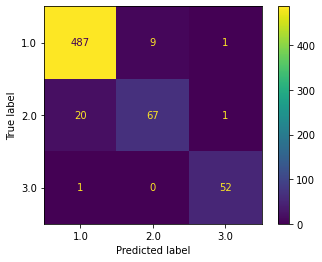

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

y = df['fetal_health']
X = df.drop("fetal_health", axis=1)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("------------------------------------------------------")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------")
print("MCC:",matthews_corrcoef(y_test, y_pred))
print("------------------------------------------------------")
print("Kappa:",cohen_kappa_score(y_test, y_pred))
print("------------------------------------------------------")
plot_confusion_matrix(model, X_test, y_test)

# Binary Classifier

In [6]:
df2 = pd.read_csv("binary.csv", low_memory=True, sep=",")

In [7]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


------------------------------------------------------
Accuracy: 0.8571428571428571
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

------------------------------------------------------
MCC: 0.7110045701712471
------------------------------------------------------
Kappa: 0.710828648252261
------------------------------------------------------
AUC: 0.9307317073170732
------------------------------------------------------
 


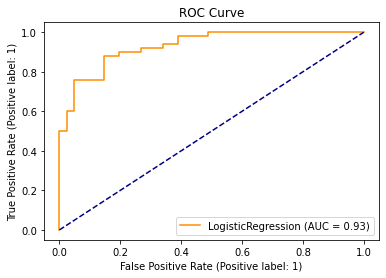

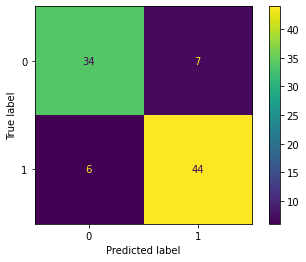

In [47]:
from sklearn.linear_model import LogisticRegression

y = df2['target']
X = df2.drop("target", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("------------------------------------------------------")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------")
print("MCC:",matthews_corrcoef(y_test, y_pred))
print("------------------------------------------------------")
print("Kappa:",cohen_kappa_score(y_test, y_pred))
print("------------------------------------------------------")
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("------------------------------------------------------")
print(" ")
metrics.plot_roc_curve(model, X_test, y_test, color='darkorange',drop_intermediate=False)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot_confusion_matrix(model, X_test, y_test)